### 01 Create Ubuntu Virtual Machine on Azure

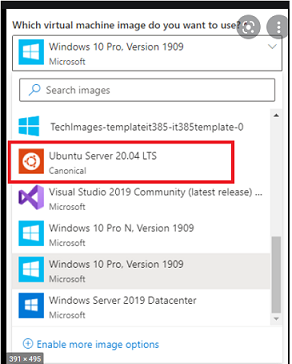

### 02 Install Putty on the Client Machine (You local windows 10)

Using putty you can run bash commands on Ubuntu machine

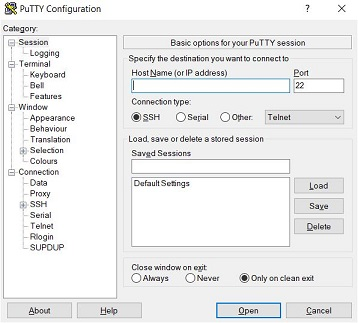

In [ ]:
'''
# Login by providing the username and password
login as: santhoshNKumar
santhoshNKumar@20.119.37.89's password

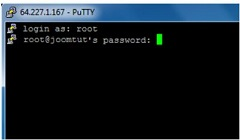

### 03  Install Remote Desktop (Xrdp) on Ubuntu

This enables us to connect ubuntu machine from remote desktop connection

In [ ]:
# Install xfce
santhoshNKumar@Ubuntu:~$ santhoshNKumar@Ubuntu:~$ sudo apt-get update
santhoshNKumar@Ubuntu:~$ sudo apt-get -y install xfce4
santhoshNKumar@Ubuntu:~$ sudo apt install xfce4-session

# Install and configure a remote desktop server
santhoshNKumar@Ubuntu:~$ sudo apt-get -y install xrdp
santhoshNKumar@Ubuntu:~$ sudo systemctl enable xrd

# Configure xrdp to use xfce as your desktop environment
santhoshNKumar@Ubuntu:~$ echo xfce4-session >~/.xsession

# Restart the xrdp service for the changes to take effect
santhoshNKumar@Ubuntu:~$ sudo service xrdp restart

# Set a local user account password
santhoshNKumar@Ubuntu:~$ sudo passwd santhoshNKumar

In [ ]:
'''
Below the command needs to be run from 'powerShell'
*** Note: make Sure Azure CLI installer installed on the machine

# Create a Network Security Group rule for Remote Desktop traffic
az vm open-port --resource-group RS --name Ubuntu --port 3389

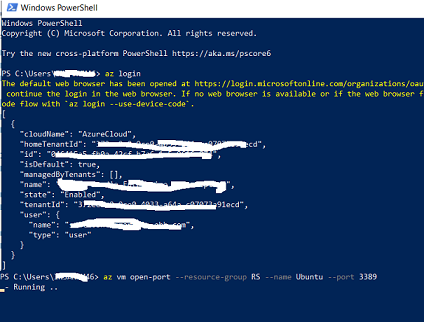

### 04 Install Chrome on Ubuntu

In [ ]:
santhoshNKumar@Ubuntu:~$ cd /tmp

santhoshNKumar@Ubuntu:/tmp$ wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb

santhoshNKumar@Ubuntu:/tmp$ sudo dpkg -i google-chrome-stable_current_amd64.deb

santhoshNKumar@Ubuntu:/tmp$ sudo apt-get -f install

### 05 Install Python on Ubuntu

In [ ]:
santhoshNKumar@Ubuntu:/$ sudo apt update

santhoshNKumar@Ubuntu:/$ sudo apt install software-properties-common

santhoshNKumar@Ubuntu:/$ sudo add-apt-repository ppa:deadsnakes/ppa

santhoshNKumar@Ubuntu:/$ sudo apt update

santhoshNKumar@Ubuntu:/$ sudo apt install python3.8

santhoshNKumar@Ubuntu:/$ python3 --version

### 06 Install Hadoop on Ubuntu

In [ ]:
# Prerequisites setup

santhoshNKumar@Ubuntu:/$ sudo apt update
santhoshNKumar@Ubuntu:/$ sudo apt install openjdk-8-jdk -y

santhoshNKumar@Ubuntu:/$ java -version; javac -version
santhoshNKumar@Ubuntu:/$ sudo apt install openssh-server openssh-client -y

santhoshNKumar@Ubuntu:/$ ssh-keygen -t rsa -P '' -f ~/.ssh/id_rsa
santhoshNKumar@Ubuntu:/$ cat ~/.ssh/id_rsa.pub >> ~/.ssh/authorized_keys
santhoshNKumar@Ubuntu:/$ chmod 0600 ~/.ssh/authorized_keys
santhoshNKumar@Ubuntu:/$ ssh localhost

In [ ]:
# Downloading Hadoop
===============================
santhoshNKumar@Ubuntu:/$ wget https://downloads.apache.org/hadoop/common/hadoop-3.2.2/hadoop-3.2.2.tar.gz
santhoshNKumar@Ubuntu:/$ tar xzf hadoop-3.2.2.tar.gz

In [ ]:
# Here we need to edit total 6 Important files
    1. .bashrc  # for setting environmen varibales
    2. hadoop-env.sh  # setting JAVA_HOME
    3. core-site.xml
    4. hdfs-site.xml
    5. mapred-site.xml
    6. yarn-site.xml

In [ ]:
# 1st file

santhoshNKumar@Ubuntu:/$ sudo nano .bashrc

#Add below lines in this file

    #Hadoop Related Options
    export HADOOP_HOME=/home/santhoshNKumar/hadoop-3.2.2/
    export HADOOP_INSTALL=$HADOOP_HOME
    export HADOOP_MAPRED_HOME=$HADOOP_HOME
    export HADOOP_COMMON_HOME=$HADOOP_HOME
    export HADOOP_HDFS_HOME=$HADOOP_HOME
    export YARN_HOME=$HADOOP_HOME
    export HADOOP_COMMON_LIB_NATIVE_DIR=$HADOOP_HOME/lib/native
    export PATH=$PATH:$HADOOP_HOME/sbin:$HADOOP_HOME/bin
    export HADOOP_OPTS"-Djava.library.path=$HADOOP_HOME/lib/nativ"

# Reload the file
source ~/.bashrc

# check the path configured properly
santhoshNKumar@Ubuntu:~$ echo $HADOOP_HOME

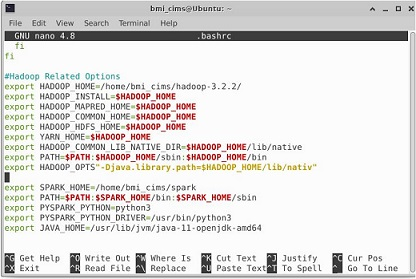

Note : while editing file in ubuntu use top and bottom and left and right rows to move and to save click (ctrl+x) then say Y and enter

In [ ]:
# 2nd File
============================
santhoshNKumar@Ubuntu:/$ sudo nano $HADOOP_HOME/etc/hadoop/hadoop-env.sh

#Add below line in this file in the end
export JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64

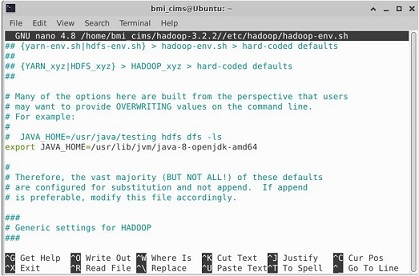

In [ ]:
# 3rd File
===============================
santhoshNKumar@Ubuntu:/$ sudo nano $HADOOP_HOME/etc/hadoop/core-site.xml

#Add below lines in this file(between "<configuration>" and "<"/configuration>")
   <property>
        <name>hadoop.tmp.dir</name>
        <value>/home/santhoshNKumar/tmpdata</value>
        <description>A base for other temporary directories.</description>
    </property>
    <property>
        <name>fs.default.name</name>
        <value>hdfs://localhost:9000</value>
        <description>The name of the default file system></description>
    </property>

In [ ]:
# 4th File
====================================
santhoshNKumar@Ubuntu:/$ sudo nano $HADOOP_HOME/etc/hadoop/hdfs-site.xml

#Add below lines in this file(between "<configuration>" and "<"/configuration>")

    <property>
      <name>dfs.data.dir</name>
      <value>/home/santhoshNKumar/dfsdata/namenode</value>
    </property>
    <property>
      <name>dfs.data.dir</name>
      <value>/home/santhoshNKumar/dfsdata/datanode</value>
    </property>
    <property>
      <name>dfs.replication</name>
      <value>1</value>
    </property>

In [ ]:
# 5th File
================================================

sudo nano $HADOOP_HOME/etc/hadoop/mapred-site.xml

#Add below lines in this file(between "<configuration>" and "<"/configuration>")

<property>
  <name>mapreduce.framework.name</name>
  <value>yarn</value>
</property>


In [ ]:
# 6th File
==================================================
sudo nano $HADOOP_HOME/etc/hadoop/yarn-site.xml

#Add below lines in this file(between "<configuration>" and "<"/configuration>")

<property>
  <name>yarn.nodemanager.aux-services</name>
  <value>mapreduce_shuffle</value>
</property>
<property>
  <name>yarn.nodemanager.aux-services.mapreduce.shuffle.class</name>
  <value>org.apache.hadoop.mapred.ShuffleHandler</value>
</property>
<property>
  <name>yarn.resourcemanager.hostname</name>
  <value>127.0.0.1</value>
</property>
<property>
  <name>yarn.acl.enable</name>
  <value>0</value>
</property>
<property>
  <name>yarn.nodemanager.env-whitelist</name>
  <value>JAVA_HOME,HADOOP_COMMON_HOME,HADOOP_HDFS_HOME,HADOOP_CONF_DIR,CLASSPATH_PERPEND_DISTCACHE,HADOOP_YARN_HOME,\
         HADOOP_MAPRED_HOME</value>
</property>

In [ ]:
# Launching Hadoop

# the name node
santhoshNKumar@Ubuntu:~$ hdfs namenode -format

# Start the services
santhoshNKumar@Ubuntu:~/hadoop-3.2.2/sbin$ ./start-dfs.sh
santhoshNKumar@Ubuntu:~/hadoop-3.2.2/sbin$ ./start-yarn.sh

# Check Hadoop Installed Properly
santhoshNKumar@Ubuntu:~/hadoop-3.2.2/sbin$ jps

# Check the Hadoop directory
santhoshNKumar@Ubuntu:~/hadoop-3.2.2/sbin$ hdfs dfs -ls /

# Move a sample file to hadoop
santhoshNKumar@Ubuntu:~/hadoop-3.2.2/sbin$ hdfs dfs -put /home/santhoshNKumar/hadoop-3.2.2/etc/hadoop/core-site.xml /

# check the moved file
santhoshNKumar@Ubuntu:~/hadoop-3.2.2/sbin$ hdfs dfs -ls /

In [ ]:
# Check the Hadoop Web UI
==================================
There are three web user interfaces to be used:
    1. Name node web page
        http://localhost:9870/dfshealth.html

    2. Data node web page
        http://localhost:9864/datanode.html

    3. Yarn web page
        http://localhost:8088/cluster

### 06 Install Spark on Ubuntu

In [ ]:
# Prerequisites setup

# Install Java JRE
santhoshNKumar@Ubuntu:~$ sudo apt-get install openjdk-11-jre

# Install Java JDK
santhoshNKumar@Ubuntu:~$ sudo apt-get install openjdk-11-jdk

# Check the Java Version
santhoshNKumar@Ubuntu:~$ java --version

In [ ]:
# Install scala
santhoshNKumar@Ubuntu:~$ sudo apt install scala default-jdk

# Check the Scala Version
santhoshNKumar@Ubuntu:~$ scala -version

# Download Spark Library
santhoshNKumar@Ubuntu:~$ wget https://downloads.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

# Extract the ziped file
santhoshNKumar@Ubuntu:~$ tar xzf spark-3.2.0-bin-hadoop3.2.tgz

# Rename the zip file
santhoshNKumar@Ubuntu:~$ mv spark-3.2.0-bin-hadoop3.2 spark

In [ ]:
# Set Enviroment Varibales

santhoshNKumar@Ubuntu:~$ sudo nano .bashrc

#Add below lines in this file
export SPARK_HOME=/home/bmi_cims/spark
export PATH=$PATH:$SPARK_HOME/bin:$SPARK_HOME/sbin
export PYSPARK_PYTHON=python3
export PYSPARK_PYTHON_DRIVER=/usr/bin/python3
export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64

# Reload the file
source ~/.bashrc

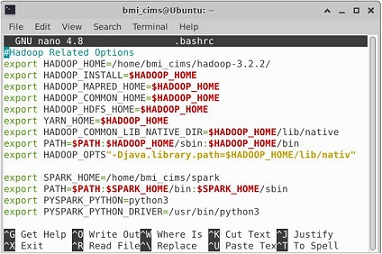

In [ ]:
# Check the spark Home path
echo $SPARK_HOME

# Install Pip 
santhoshNKumar@Ubuntu:~$ sudo apt-get install python3-pip

# Install Pyspark
santhoshNKumar@Ubuntu:/$ sudo pip3 install pyspark

# Go to the path where Spark Home configured
santhoshNKumar@Ubuntu:/$ cd /home/santhoshNKumar/spark/

# run spark shell
santhoshNKumar@Ubuntu:/usr/santhoshNKumar/spark/bin$ spark-shell

# comeout of the spark-shell
:quit

# run pyspark
santhoshNKumar@Ubuntu:/usr/santhoshNKumar/spark/bin$ pyspark

In [ ]:
# Configure Master and Slave

    # Navigate to Spark Configuration Directory and Edit 'spark-env.sh.template' and set the spark master ip
    santhoshNKumar@Ubuntu:~/spark/conf$ sudo nano spark-env.sh.template

    # add this on the file
    SPARK_MASTER_HOST='20.119.37.89'   (Machine ip)

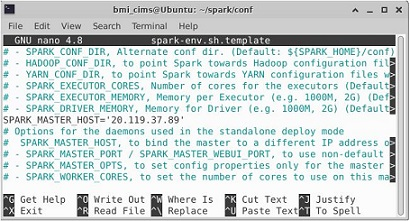

In [ ]:
# Start spark as master.
santhoshNKumar@Ubuntu:~/spark/sbin$ ./start-master.sh

# Start Spark Slave or worker
santhoshNKumar@Ubuntu:~/spark/sbin$ ./start-worker.sh spark://20.119.37.89:7077

In [ ]:
# Access Master and Slave Web GUI

Access master’s web UI on the Url 
    - http://localhost:8080/

Access Slave's web UI on the Url
    - http://localhost:8081/

Browse for Jobs
    - http://localhost:4040/